In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None) #Увеличиваю число отображаемых колонок до максимума

In [3]:
attrs = pd.read_csv(r"C:\Users\gavri\OneDrive\Рабочий стол\FRprojectDLS\archive\list_attr_celeba.csv")
bbox = pd.read_csv(r"C:\Users\gavri\OneDrive\Рабочий стол\FRprojectDLS\archive\list_bbox_celeba.csv")

In [4]:
def load_keypoints_from_txt(txt_path, num_points=5):
    data = []
    
    with open(txt_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != (1 + num_points * 2):  # 1 для id + 10 координат
                continue
                
            img_id = parts[0]
            points = []
            
            for i in range(num_points):
                x = float(parts[1 + i*2])
                y = float(parts[2 + i*2])
                points.extend([x, y])
            
            data.append([img_id] + points)

    columns = ['image_id']
    for i in range(num_points):
        columns.extend([f'x{i+1}', f'y{i+1}'])
    
    points = pd.DataFrame(data, columns=columns)
    
    return points

txt_path = r"C:\Users\gavri\OneDrive\Рабочий стол\FRprojectDLS\list_landmarks_celeba.txt"
points = load_keypoints_from_txt(txt_path, num_points=5)
points

,image_id,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
0,000001.jpg,165.0,184.0,244.0,176.0,196.0,249.0,194.0,271.0,266.0,260.0
1,000002.jpg,140.0,204.0,220.0,204.0,168.0,254.0,146.0,289.0,226.0,289.0
2,000003.jpg,244.0,104.0,264.0,105.0,263.0,121.0,235.0,134.0,251.0,140.0
3,000004.jpg,796.0,539.0,984.0,539.0,930.0,687.0,762.0,756.0,915.0,756.0
4,000005.jpg,273.0,169.0,328.0,161.0,298.0,172.0,283.0,208.0,323.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,1449.0,201.0,1530.0,201.0,1491.0,259.0,1457.0,282.0,1522.0,286.0
202595,202596.jpg,172.0,186.0,222.0,186.0,193.0,220.0,171.0,230.0,222.0,230.0
202596,202597.jpg,81.0,121.0,113.0,120.0,101.0,142.0,81.0,155.0,116.0,155.0
202597,202598.jpg,223.0,73.0,255.0,72.0,241.0,94.0,225.0,108.0,254.0,105.0


In [5]:
identities = pd.read_csv(r"C:\Users\gavri\Downloads\identity_CelebA.txt", sep='\s+', names=['image_id', 'person'])

In [6]:
identities

,image_id,person
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [7]:
attrs

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1,-1,1


переведу в более приятный для глаза формат 0/1

In [8]:
attrs.replace(-1, 0, inplace=True)

In [9]:
attrs

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1


In [10]:
(identities['person'].value_counts() == 30).sum()

np.int64(2343)

С учётом последующего обучения ArcFace, вероятно, следует отобрать людей с большим числом фотографий, из которых отобрать фото с наиболее различными атрибутами. Предположительно пока что буду ориентироваться на 1200 людей по 12-15 фото (оказалось недостаточно, впоследствие решил расширить выборку до 20 фотографий)

In [11]:
attrs_identities = pd.merge(
        attrs,
        identities,
        left_on='image_id',
        right_on='image_id',
        how='inner'
    )

In [12]:
attrs_identities

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,person
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,2880
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2937
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,8692
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,5805
4,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,9295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,9761
202595,202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,7192
202596,202597.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,9852
202597,202598.jpg,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,5570


In [13]:
person_count = attrs_identities.groupby('person').size()

In [14]:
person_count

person
1        29
2         8
3        25
4        22
5        20
         ..
10173    30
10174    30
10175    30
10176    30
10177    13
Length: 10177, dtype: int64

Отбираю людей с 30-ю фотографиями, в силу большого количества фотографий, их разнообразие вероятно тоже будет выше, чем для людей с меньшим количеством

In [15]:
person_30 = person_count[person_count == 30].index.tolist()

In [16]:
attrs_identities_30 = attrs_identities[attrs_identities['person'].isin(person_30)]

In [17]:
attrs_identities_30

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,person
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,2880
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2937
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,8692
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,5805
5,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,4153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202591,202592.jpg,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,7824
202593,202594.jpg,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,8984
202594,202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,9761
202595,202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,7192


объединяю отобранный датасет из людей имеющих по 30 фотографий с bbox-ами и целевыми точками

In [18]:
df = pd.merge(
        attrs_identities_30,
        bbox,
        left_on='image_id',
        right_on='image_id',
        how='inner'
    )

In [19]:
df = pd.merge(
        df,
        points,
        left_on='image_id',
        right_on='image_id',
        how='inner'
    )

In [20]:
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,person,x_1,y_1,width,height,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,2880,95,71,226,313,165.0,184.0,244.0,176.0,196.0,249.0,194.0,271.0,266.0,260.0
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2937,72,94,221,306,140.0,204.0,220.0,204.0,168.0,254.0,146.0,289.0,226.0,289.0
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,8692,216,59,91,126,244.0,104.0,264.0,105.0,263.0,121.0,235.0,134.0,251.0,140.0
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,5805,622,257,564,781,796.0,539.0,984.0,539.0,930.0,687.0,762.0,756.0,915.0,756.0
4,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,4153,146,67,182,252,202.0,158.0,259.0,165.0,234.0,196.0,197.0,228.0,243.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70285,202592.jpg,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,7824,409,108,107,148,442.0,161.0,489.0,158.0,465.0,184.0,447.0,202.0,496.0,199.0
70286,202594.jpg,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,8984,108,127,244,338,183.0,249.0,269.0,249.0,231.0,312.0,194.0,343.0,258.0,338.0
70287,202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,9761,1381,91,221,306,1449.0,201.0,1530.0,201.0,1491.0,259.0,1457.0,282.0,1522.0,286.0
70288,202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,7192,137,129,114,158,172.0,186.0,222.0,186.0,193.0,220.0,171.0,230.0,222.0,230.0


На данном этапе необходимо отобрать фото для обучения. Ориентировочно около 24000 - 1200 человек по 20 фотографий. Ключевым атрибутом для стратификации лично на
мой взгляд является пол, посмотрим насколько это будет корректно

In [21]:
#Определяем пол каждого человека по большинству фото - мало ли где разметка плохая 
person_male = attrs_identities_30.groupby('person')['Male'].agg(['mean'])
# Если у человека > 50% фото с Male=1, считаем его мужчиной
person_male['gender'] = (person_male['mean'] > 0.5).astype(int)

person_male

,mean,gender
person,,
14,0.966667,1
15,1.000000,1
17,1.000000,1
21,1.000000,1
22,1.000000,1
...,...,...
10167,0.000000,0
10173,0.133333,0
10174,0.000000,0


И вправду разметка плохая (а может это Вачовски или еще кто попали))

In [22]:
# Берем долю мужчин в полном датасете
target_male_ratio = attrs['Male'].mean()

# Вычисляем сколько нужно мужчин и женщин
n_male = int(np.round(1200 * target_male_ratio))
n_female = 1200 - n_male

# Получаем списки ID мужчин и женщин
male_people = person_male[person_male['gender'] == 1].index.tolist()
female_people = person_male[person_male['gender'] == 0].index.tolist()

# Случайно отбираем нужное количество людей из каждой группы
selected_male = np.random.choice(male_people, size=n_male, replace=False)
selected_female = np.random.choice(female_people, size=n_female, replace=False)

selected_people = list(selected_male) + list(selected_female)

# Для каждого отобранного человека берем 20 случайных фото
final_samples = []

for person_id in selected_people:
    person_photos = df[df['person'] == person_id]
    selected_photos = person_photos.sample(n=20, random_state=42)
    final_samples.append(selected_photos)

# Cобираем финальный датафрейм
final_df = pd.concat(final_samples, ignore_index=True)

In [23]:
# Проверяем результат
print(f"\nИтоговый размер выборки: {len(final_df)} фото")
print(f"Уникальных людей: {final_df['person'].nunique()}")


Итоговый размер выборки: 24000 фото
Уникальных людей: 1200


Сравним, насколько репрезантативной относительно изначального датасета были отобраны атрибуты

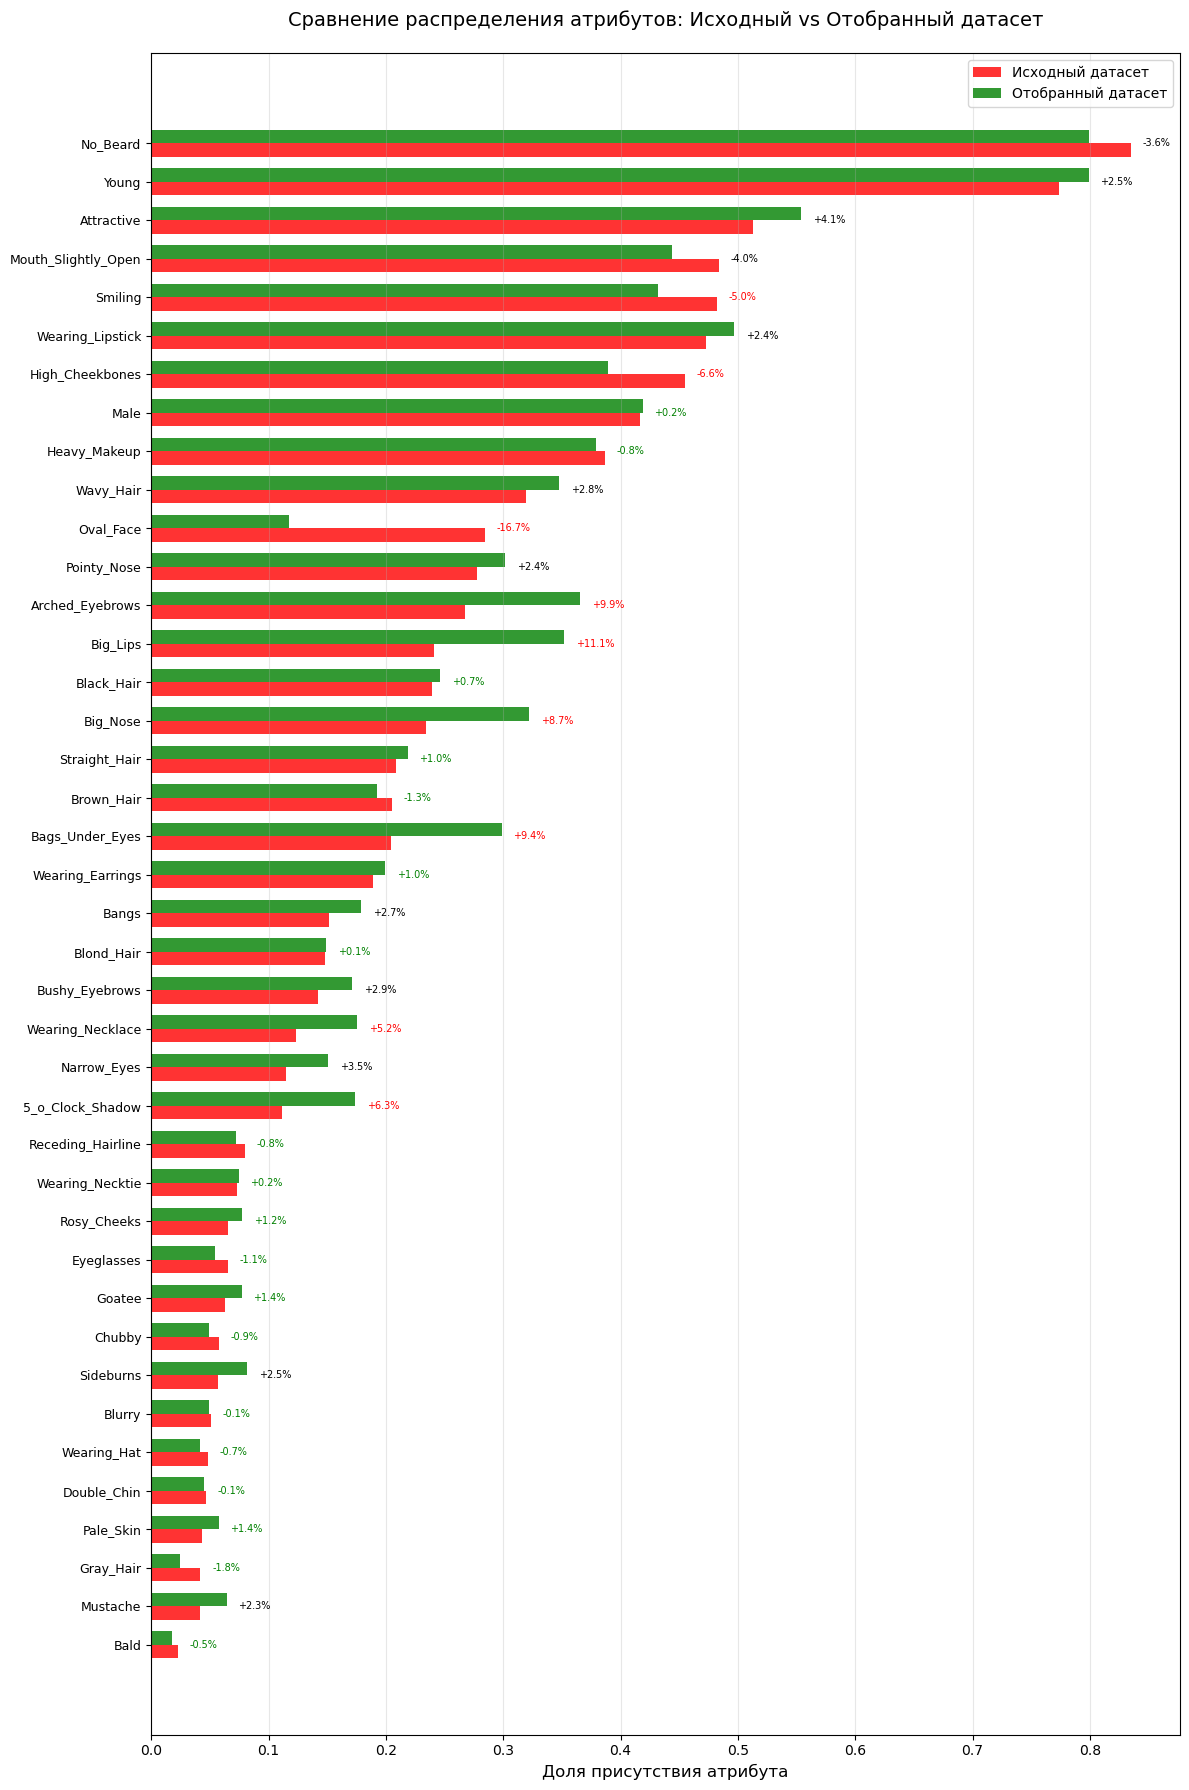

In [24]:
# Список всех атрибутов
attributes = [
    '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 
    'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 
    'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 
    'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 
    'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 
    'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 
    'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 
    'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'
]

# Вычисляем проценты для обоих датасетов
original_percentages = attrs[attributes].mean().sort_values()
final_percentages = final_df[attributes].mean()
# Сортируем по исходному датасету для сравнения
final_percentages = final_percentages[original_percentages.index]

# Создаем сравнение
fig, ax = plt.subplots(figsize=(12, 18))
x = np.arange(len(attributes))
width = 0.35

bars1 = ax.barh(x - width/2, original_percentages.values, height=width, 
                label='Исходный датасет', alpha=0.8, color='red')
bars2 = ax.barh(x + width/2, final_percentages.values, height=width, 
                label='Отобранный датасет', alpha=0.8, color='green')

ax.set_yticks(x)
ax.set_yticklabels(original_percentages.index, fontsize=9)
ax.set_xlabel('Доля присутствия атрибута', fontsize=12)
ax.set_title('Сравнение распределения атрибутов: Исходный vs Отобранный датасет', 
             fontsize=14, pad=20)
ax.legend()
ax.grid(True, alpha=0.3, axis='x')

# Добавляем разницу в процентах
for i, (orig, fin) in enumerate(zip(original_percentages.values, final_percentages.values)):
    diff = fin - orig
    color = 'green' if abs(diff) < 0.02 else 'red' if abs(diff) > 0.05 else 'black'
    ax.text(max(orig, fin) + 0.01, i, f'{diff:+.1%}', 
            va='center', fontsize=7, color=color)

plt.tight_layout()
plt.show()

Ну, в целом конечно не идеально, есть 6 атрибутов с откровенно большой (8%+) разницей, однако в целом выборку можно считать довольно репрезентативной.
1) Мешки под глазами  - не пермаментный признак, ровно как и щетина (ну, для некоторых людец конечно пермаментный)
2) Арочные брови тоже признка довольно изменчивый, меняется макияжем и выщипыванием
3) Наиболее важным среди этих атрибутов является наверное форма лица, однако с помощью последующих афинных преобразований все лица будут приведены к более-менее одинаковому виду и этот признак нивелируется((надеюсь))
4) широкий нос и большие губы - могут от ракурса зависеть конечно, но тут даже не знаю что написать можно, скорее просто мой косяк, который, однако, довольно трудно будет исправить не сломав другие доли

In [25]:
final_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,person,x_1,y_1,width,height,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
0,180129.jpg,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2279,381,80,260,360,461.0,210.0,549.0,210.0,502.0,261.0,472.0,310.0,541.0,308.0
1,173276.jpg,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2279,214,234,260,360,294.0,364.0,442.0,353.0,369.0,435.0,317.0,463.0,437.0,453.0
2,177224.jpg,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2279,96,65,138,191,138.0,134.0,194.0,139.0,168.0,167.0,139.0,187.0,183.0,188.0
3,173376.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2279,189,36,91,126,217.0,81.0,243.0,86.0,230.0,97.0,212.0,116.0,233.0,119.0
4,169458.jpg,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2279,183,80,112,155,217.0,136.0,256.0,136.0,238.0,160.0,216.0,179.0,250.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,139038.jpg,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,10130,145,80,96,133,175.0,128.0,202.0,119.0,181.0,144.0,185.0,161.0,207.0,156.0
23996,009783.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,10130,263,80,117,162,299.0,138.0,334.0,136.0,301.0,155.0,298.0,179.0,325.0,181.0
23997,011400.jpg,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,10130,131,48,94,130,160.0,95.0,194.0,99.0,161.0,113.0,154.0,130.0,188.0,135.0
23998,148536.jpg,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,10130,77,147,208,288,141.0,251.0,215.0,264.0,185.0,293.0,138.0,331.0,205.0,339.0


Ну а теперь можно и удалить атрибуты

In [26]:
final_df = final_df.drop(attributes, axis=1)

Добавлю в датасет пути к изображениям, они не содержат дублирования имени папки в силу того, что я вручную решил перебросить изображения в корневую папку и дубляж удалил

In [27]:
def generate_paths(df, base_path):
    paths = []
    for img_id in df['image_id']:
        img_num = int(str(img_id).replace('.jpg', ''))
        folder = (img_num - 1) // 10000 + 1
        filename = f"{img_num:06d}.jpg"
        paths.append(os.path.join(base_path, f"Part {folder}", filename))
    df['path'] = paths
    return df

base_path = r'C:\Users\gavri\OneDrive\Рабочий стол\FRprojectDLS\archive'
final_df = generate_paths(final_df, base_path)

In [28]:
final_df

,image_id,person,x_1,y_1,width,height,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,path
0,180129.jpg,2279,381,80,260,360,461.0,210.0,549.0,210.0,502.0,261.0,472.0,310.0,541.0,308.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
1,173276.jpg,2279,214,234,260,360,294.0,364.0,442.0,353.0,369.0,435.0,317.0,463.0,437.0,453.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
2,177224.jpg,2279,96,65,138,191,138.0,134.0,194.0,139.0,168.0,167.0,139.0,187.0,183.0,188.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
3,173376.jpg,2279,189,36,91,126,217.0,81.0,243.0,86.0,230.0,97.0,212.0,116.0,233.0,119.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
4,169458.jpg,2279,183,80,112,155,217.0,136.0,256.0,136.0,238.0,160.0,216.0,179.0,250.0,179.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,139038.jpg,10130,145,80,96,133,175.0,128.0,202.0,119.0,181.0,144.0,185.0,161.0,207.0,156.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
23996,009783.jpg,10130,263,80,117,162,299.0,138.0,334.0,136.0,301.0,155.0,298.0,179.0,325.0,181.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
23997,011400.jpg,10130,131,48,94,130,160.0,95.0,194.0,99.0,161.0,113.0,154.0,130.0,188.0,135.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...
23998,148536.jpg,10130,77,147,208,288,141.0,251.0,215.0,264.0,185.0,293.0,138.0,331.0,205.0,339.0,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...


Переведем абсолютные координаты точек в относительные по bbox-ам

In [29]:
def convert_points_to_bbox_coords(row):
    # Создаем словарь для результата
    result = {}
    
    for i in range(1, 6):
        # Вычисляем нормализованные координаты
        x_norm = (row[f'x{i}'] - row['x_1']) / row['width']
        y_norm = (row[f'y{i}'] - row['y_1']) / row['height']
        
        result[f'x{i}_bbox_norm'] = x_norm
        result[f'y{i}_bbox_norm'] = y_norm
    
    return pd.Series(result)

final_df = final_df.join(final_df.apply(convert_points_to_bbox_coords, axis=1))

In [30]:
final_df = final_df.drop(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5'], axis=1)

In [31]:
final_df.describe()

,person,x_1,y_1,width,height,x1_bbox_norm,y1_bbox_norm,x2_bbox_norm,y2_bbox_norm,x3_bbox_norm,y3_bbox_norm,x4_bbox_norm,y4_bbox_norm,x5_bbox_norm,y5_bbox_norm
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,5277.119167,210.506458,101.454750,227.934583,315.104958,0.307978,0.361164,0.663710,0.355602,0.487024,0.521935,0.334568,0.632964,0.652712,0.628591
std,2747.584159,199.352766,95.684856,179.956446,248.389664,0.010473,0.010376,0.049725,0.089723,0.088258,0.059327,0.131562,0.026063,0.136010,0.087314
min,22.000000,1.000000,1.000000,5.000000,7.000000,0.142857,0.122995,-1.100000,-7.142857,-1.217391,-4.071429,-3.388889,-1.428571,-3.222222,-6.857143
25%,3034.750000,97.000000,48.000000,125.000000,173.000000,0.307087,0.360000,0.638132,0.334906,0.454545,0.501299,0.298077,0.629630,0.605263,0.609272
50%,5253.000000,150.000000,77.000000,179.000000,248.000000,0.307692,0.361111,0.664634,0.356522,0.491228,0.524079,0.334375,0.636569,0.651466,0.630769
75%,7406.250000,246.000000,119.000000,260.000000,360.000000,0.308290,0.361386,0.692308,0.377483,0.524476,0.546257,0.369231,0.638889,0.703411,0.650293
max,10157.000000,3688.000000,1555.000000,3076.000000,4259.000000,0.788889,0.816667,1.331126,2.920000,6.600000,1.400000,11.400000,0.843972,11.600000,2.680000


видимо были некоторые неточности в разметке, потому что некоторые нормализованные координаты находятся сильно далеко (аж 4.2) за рамками боксов. Придется найти их и почистить от датасет таких фото, 
а так-же предпочту убрать точки рядом с границей изображения

In [32]:
norm_cols = ['x1_bbox_norm', 'y1_bbox_norm', 'x2_bbox_norm', 'y2_bbox_norm', 'x3_bbox_norm', 'y3_bbox_norm', 
             'x4_bbox_norm', 'y4_bbox_norm', 'x5_bbox_norm', 'y5_bbox_norm']
# Находим строки с координатами вне [0.06, 0.94]
problem_mask = (
    (final_df[norm_cols] < 0.06).any(axis=1) | 
    (final_df[norm_cols] > 0.94).any(axis=1)
)

problem_rows = final_df[problem_mask]
print(f"Найдено проблемных строк: {len(problem_rows)} ({len(problem_rows)/len(final_df)*100:.2f}%)")

# Удаляем их
final_df = final_df[~problem_mask].copy()
print(f"Осталось чистых строк: {len(final_df)}")

Найдено проблемных строк: 215 (0.90%)
Осталось чистых строк: 23785


In [33]:
final_df[norm_cols].describe()

,x1_bbox_norm,y1_bbox_norm,x2_bbox_norm,y2_bbox_norm,x3_bbox_norm,y3_bbox_norm,x4_bbox_norm,y4_bbox_norm,x5_bbox_norm,y5_bbox_norm
count,23785.000000,23785.000000,23785.000000,23785.000000,23785.000000,23785.000000,23785.000000,23785.000000,23785.000000,23785.000000
mean,0.307966,0.361176,0.663908,0.356126,0.486587,0.522469,0.333997,0.633362,0.652220,0.629355
std,0.010416,0.010380,0.046128,0.043635,0.064038,0.038888,0.067168,0.017310,0.081989,0.042376
min,0.142857,0.122995,0.250000,0.065574,0.135338,0.151515,0.060150,0.140000,0.144000,0.152381
25%,0.307087,0.360000,0.638298,0.335052,0.455185,0.501695,0.298246,0.629630,0.605769,0.609467
50%,0.307692,0.361111,0.664683,0.356522,0.491228,0.524096,0.334448,0.636580,0.651584,0.630734
75%,0.308271,0.361386,0.692308,0.377273,0.524064,0.546218,0.368852,0.638889,0.702970,0.650000
max,0.788889,0.816667,0.923077,0.800000,0.833333,0.707572,0.928571,0.843972,0.939024,0.882353


ну, вот так должно быть получше

In [34]:
final_df

,image_id,person,x_1,y_1,width,height,path,x1_bbox_norm,y1_bbox_norm,x2_bbox_norm,y2_bbox_norm,x3_bbox_norm,y3_bbox_norm,x4_bbox_norm,y4_bbox_norm,x5_bbox_norm,y5_bbox_norm
0,180129.jpg,2279,381,80,260,360,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.307692,0.361111,0.646154,0.361111,0.465385,0.502778,0.350000,0.638889,0.615385,0.633333
1,173276.jpg,2279,214,234,260,360,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.307692,0.361111,0.876923,0.330556,0.596154,0.558333,0.396154,0.636111,0.857692,0.608333
2,177224.jpg,2279,96,65,138,191,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.304348,0.361257,0.710145,0.387435,0.521739,0.534031,0.311594,0.638743,0.630435,0.643979
3,173376.jpg,2279,189,36,91,126,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.307692,0.357143,0.593407,0.396825,0.450549,0.484127,0.252747,0.634921,0.483516,0.658730
4,169458.jpg,2279,183,80,112,155,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.303571,0.361290,0.651786,0.361290,0.491071,0.516129,0.294643,0.638710,0.598214,0.638710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,139038.jpg,10130,145,80,96,133,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.312500,0.360902,0.593750,0.293233,0.375000,0.481203,0.416667,0.609023,0.645833,0.571429
23996,009783.jpg,10130,263,80,117,162,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.307692,0.358025,0.606838,0.345679,0.324786,0.462963,0.299145,0.611111,0.529915,0.623457
23997,011400.jpg,10130,131,48,94,130,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.308511,0.361538,0.670213,0.392308,0.319149,0.500000,0.244681,0.630769,0.606383,0.669231
23998,148536.jpg,10130,77,147,208,288,C:\Users\gavri\OneDrive\Рабочий стол\FRproject...,0.307692,0.361111,0.663462,0.406250,0.519231,0.506944,0.293269,0.638889,0.615385,0.666667


Зашаффлим изображения, потому что выше они сортировались по личности и в противном случае тренировочная выборка будет состоять из одних людей, а тестовая из валидационная из других

In [35]:
train_df, temp_df = train_test_split(
    final_df, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

val_df, test_df = train_test_split(
    temp_df, 
    test_size=0.5, 
    random_state=42
)


In [36]:
save_dir = r"../datasets"
os.makedirs(save_dir, exist_ok=True)

# Сохраняем в CSV
train_df.to_csv(f"{save_dir}/processed_train_dataset.csv", index=False)
val_df.to_csv(f"{save_dir}/processed_val_dataset.csv", index=False)
test_df.to_csv(f"{save_dir}/processed_test_dataset.csv", index=False)

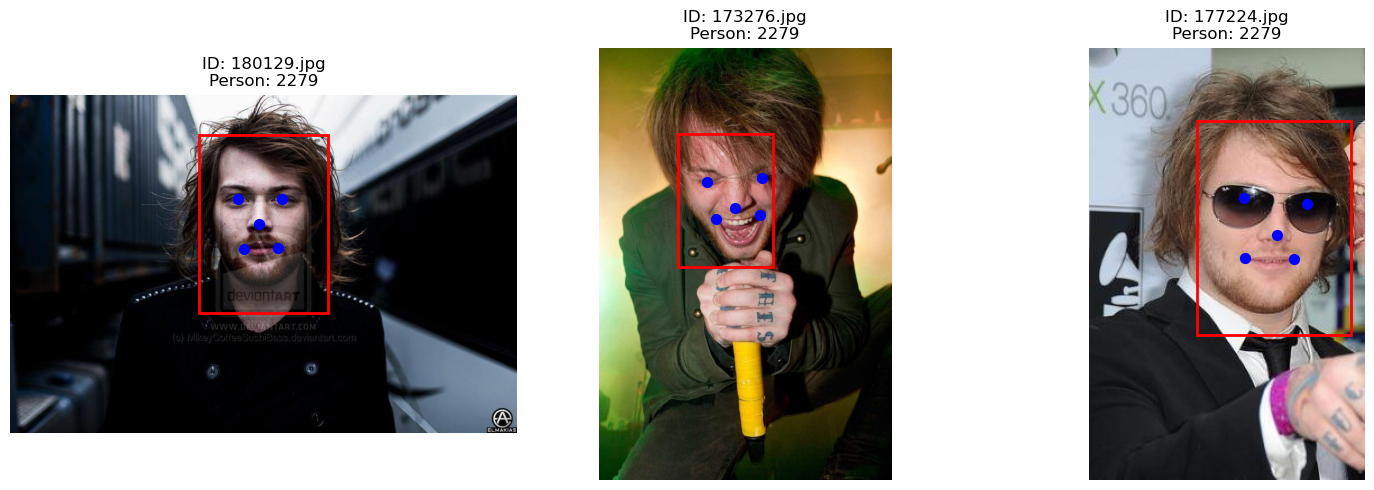

In [37]:
def visualize_correct_points(df, image_ids=None, num_samples=2):
    
    if image_ids is None:
        image_ids = df['image_id'].unique()[:num_samples]
    
    fig, axes = plt.subplots(1, len(image_ids), figsize=(5*len(image_ids), 5))
    
    if len(image_ids) == 1:
        axes = [axes]
    
    for idx, (ax, img_id) in enumerate(zip(axes, image_ids)):
        sample = df[df['image_id'] == img_id].iloc[0]
        img = Image.open(sample['path'])
        
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'ID: {img_id}\nPerson: {sample["person"]}')
        
        # BBox
        bbox = patches.Rectangle(
            (sample['x_1'], sample['y_1']),
            sample['width'], sample['height'],
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(bbox)
        
        # Точки из нормализованных координат (синие)
        for i in range(1, 6):
            x_norm = sample[f'x{i}_bbox_norm']
            y_norm = sample[f'y{i}_bbox_norm']
            x_abs = sample['x_1'] + x_norm * sample['width']
            y_abs = sample['y_1'] + y_norm * sample['height']
            
            ax.scatter(x_abs, y_abs, s=50, c='blue', marker='o')
    
    plt.tight_layout()
    plt.show()

# Тестируем
visualize_correct_points(final_df, num_samples=3)